In [373]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import zscore
import datetime
import calendar
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [374]:
##Loading train and test dataset
df=pd.read_csv("D:\\E\\ML_assignment\\fluid_AI\\NSE Training Data.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [375]:
df.shape

(1481, 7)

In [376]:
test=pd.read_csv("D:\\E\\ML_assignment\\fluid_AI\\NSE Testing Data.csv")

In [377]:
test.shape

(23, 7)

In [378]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300


In [379]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [380]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1475.000000,1475.000000,1475.000000,1475.000000,1475.000000,1.475000e+03
mean,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,3.672148e+05
std,2605.404423,2613.649325,2588.183872,2602.005796,2602.005796,2.277599e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,9362.950195,9404.100098,9290.100097,9315.899902,9315.899902,1.956000e+05
50%,10781.849609,10816.349609,10718.750000,10769.150391,10769.150391,2.906000e+05
75%,11925.699707,11968.899903,11847.475097,11914.125000,11914.125000,5.092500e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


it describes the minimum open value is 7023.649902 and maximum value is 18602.349609

#EXPLORATORY DATA ANALYSIS

##Handling null values

In [128]:
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [129]:
test.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

__All the null values in training dataset are float values so replacing  null values with mean

In [130]:
col=[ 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in col:
    df[i]=df[i].fillna(df[i].mean())

In [131]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [132]:
comparison_column = np.where(df["Close"] == df["Adj Close"], 0, 1)

In [133]:
comparison_column.sum()

0

All the values of close and adj close are same

In [134]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [135]:
##seperating Date column as day,month and year

In [136]:
df["Day"] = pd.to_datetime(df["Date"],format="%Y/%m/%d").dt.day
df["Month"] = pd.to_datetime(df["Date"],format="%Y/%m/%d").dt.month
df["Year"] = pd.to_datetime(df["Date"],format="%Y/%m/%d").dt.year
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,4,1,2016
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,5,1,2016
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,6,1,2016
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,7,1,2016
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,8,1,2016


In [228]:
test["Day"] = pd.to_datetime(test["Date"],format="%Y/%m/%d").dt.day
test["Month"] = pd.to_datetime(test["Date"],format="%Y/%m/%d").dt.month
test["Year"] = pd.to_datetime(test["Date"],format="%Y/%m/%d").dt.year
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500,3,1,2022
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400,4,1,2022
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500,5,1,2022
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500,6,1,2022
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300,7,1,2022


In [138]:
##Average closing price of each year
Avg_price=df.groupby(['Year']).mean()
Avg_price["Close"]

Year
2016     8100.779898
2017     9590.717943
2018    10752.419415
2019    11433.747137
2020    11153.106680
2021    16015.315994
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Average closing price across different year'}, xlabel='Year', ylabel='Close'>

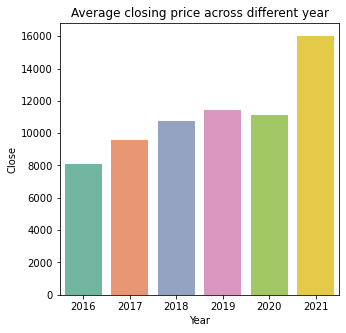

In [139]:
av=df.groupby(['Year']).mean()
av_df=pd.DataFrame(data=av)
order_dest=av_df.sort_values(by='Close',ascending=False,axis=0)
plt.figure(figsize=(5,5))
plt.title('Average closing price across different year')
sns.barplot(x=order_dest.index,y='Close',data=order_dest,palette="Set2")

In [140]:
df['Year'].value_counts()

2020    251
2017    248
2021    248
2018    246
2016    245
2019    243
Name: Year, dtype: int64

In the year 2021 there is high  differece stock closing price.this might be due to covid

<AxesSubplot:title={'center':'Average closing price across different year'}, xlabel='Month', ylabel='Close'>

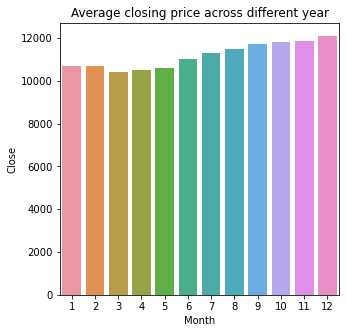

In [141]:
av=df.groupby(['Month']).mean()
av_df=pd.DataFrame(data=av)
order_dest=av_df.sort_values(by='Close',ascending=False,axis=0)
plt.figure(figsize=(5,5))
plt.title('Average closing price across different year')
sns.barplot(x=order_dest.index,y='Close',data=order_dest)

The closing price of dec is more than other months

<AxesSubplot:xlabel='Volume', ylabel='Close'>

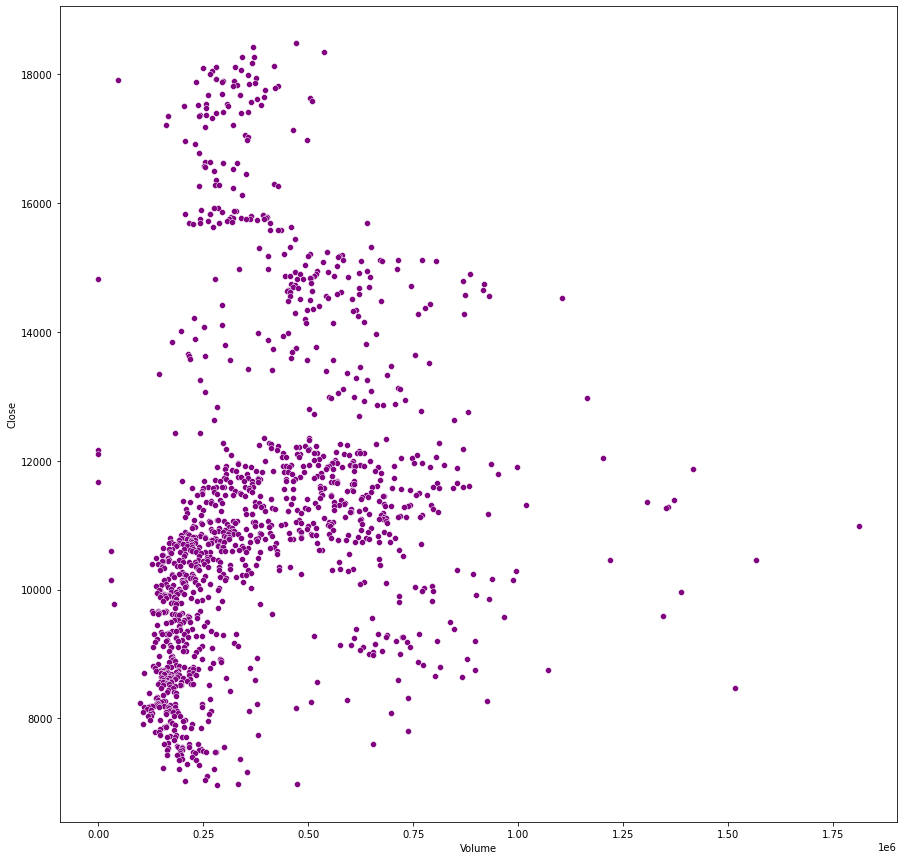

In [142]:
av=df.groupby(['Volume']).mean()
av_df=pd.DataFrame(data=av)
order_dest=av_df.sort_values(by='Close',ascending=False,axis=0)
plt.figure(figsize=(15,15))
sns.scatterplot(x=order_dest.index,y='Close',data=order_dest,color="purple")



volume is incresed over year but the closing price is not increased

<AxesSubplot:xlabel='Year', ylabel='Volume'>

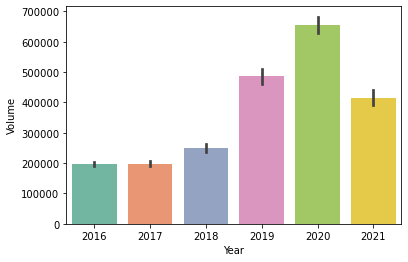

In [145]:
sns.barplot(x=df['Year'],y=df['Volume'],palette="Set2")

The volume of stock reduced in 2021

<AxesSubplot:xlabel='Year', ylabel='Close'>

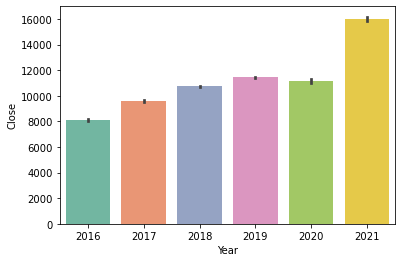

In [146]:
sns.barplot(x=df['Year'],y=df['Close'],palette="Set2")

The volume of stock is reduced in 2021 but closing price is increased

<AxesSubplot:>

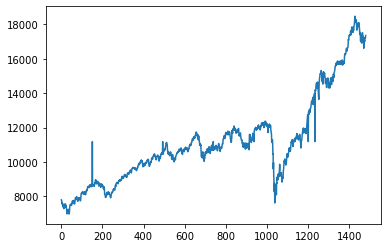

In [147]:
df.Close.plot()

<AxesSubplot:>

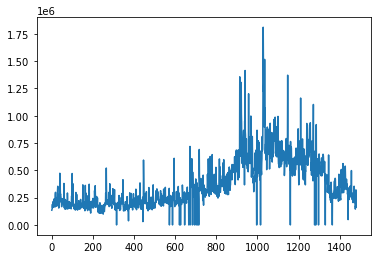

In [72]:
df.Volume.plot()

In [148]:
##converting date column to  list
date_list=df['Date'].tolist()


In [149]:
##Adding new column WeekDay
Day=[]
for i in date_list:
    s=datetime.datetime.strptime(i, '%Y-%m-%d').weekday()
    Day.append(calendar.day_name[s])
df['WeekDay']=Day

In [150]:
#new column for day is added
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,WeekDay
0,2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0,4,1,2016,Monday
1,2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0,5,1,2016,Tuesday
2,2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0,6,1,2016,Wednesday
3,2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0,7,1,2016,Thursday
4,2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0,8,1,2016,Friday


In [151]:
df['WeekDay'].value_counts()

Wednesday    300
Thursday     299
Tuesday      297
Monday       292
Friday       291
Sunday         1
Saturday       1
Name: WeekDay, dtype: int64

This dataset has only one sunday and saturday datas it might lead to wrong prediction so I'm dropping that row

In [152]:
df.loc[df['WeekDay']=="Sunday"]


,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,WeekDay
937,2019-10-27,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,367214.779661,27,10,2019,Sunday


In [153]:
df.loc[df['WeekDay']=="Saturday"]

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,WeekDay
1201,2020-11-14,11190.630103,11243.279798,11114.862019,11180.224847,11180.224847,367214.779661,14,11,2020,Saturday


In [154]:
df_new=df
df_new.drop(df_new.index[1201],inplace=True)
df_new.drop(df_new.index[937],inplace=True)

In [155]:
df_new.shape

(1479, 11)

<AxesSubplot:xlabel='WeekDay', ylabel='Volume'>

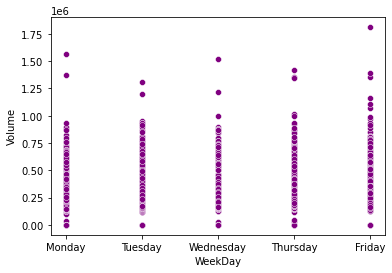

In [157]:
sns.scatterplot(x=df_new['WeekDay'],y=df_new['Volume'],color="purple")

<AxesSubplot:title={'center':'Average closing price of week days and weekend days'}, xlabel='WeekDay', ylabel='Close'>

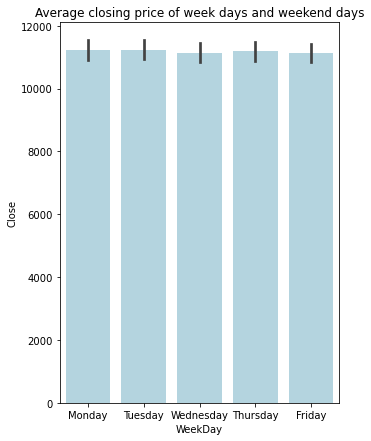

In [163]:
plt.figure(figsize=(5,7))
plt.title('Average closing price of week days and weekend days')
sns.barplot(x=df_new['WeekDay'],y=df['Close'],color="lightblue")

<AxesSubplot:xlabel='WeekDay', ylabel='Volume'>

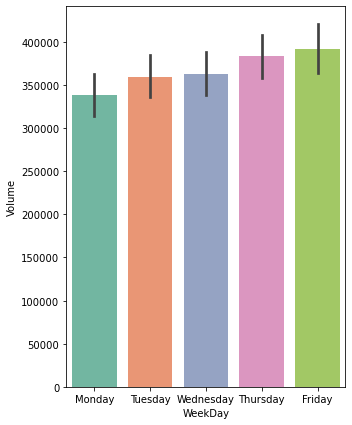

In [162]:
plt.figure(figsize = (5,7))
sns.barplot(x=df['WeekDay'],y=df['Volume'],palette="Set2")

comparitively friday has more sales than other days

In [167]:
df_new.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year', 'WeekDay'],
      dtype='object')

In [ ]:
##Handling outliers

<Figure size 2160x2160 with 0 Axes>

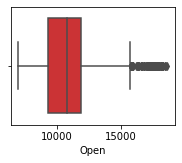

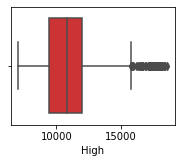

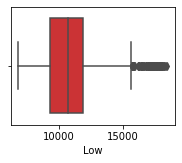

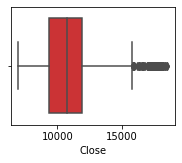

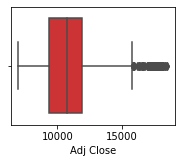

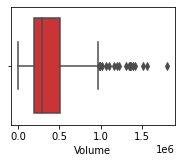

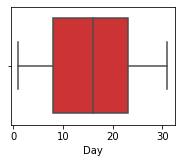

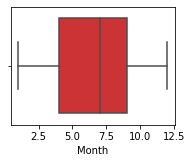

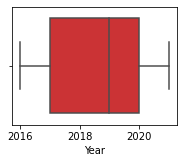

In [171]:
cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year']
ncol=3
nrows=4
plt.figure(figsize=(30,30))
for i in range(0,9):
    plt.figure(figsize=(10,10))
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(x=cols[i],data=df_new,palette="Set1")


The features 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume' are having outliers

In [195]:
data_clean=df_new
cols=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in cols:
    z = np.abs(zscore(df_new[i]))
print(np.where(z > 3))

(array([ 914,  921,  939,  956, 1026, 1027, 1028, 1029, 1030, 1031, 1034,
       1036, 1146, 1208, 1270], dtype=int64),)


In [196]:
data_clean = df_new[(z<3)]

In [197]:
data_clean.shape

(1464, 11)

In [198]:
for i in range(0,6):
    print(cols[i],"=",data_clean[cols[i]].skew())

Open = 0.9558239758423644
High = 0.9595218614986115
Low = 0.9520767489225708
Close = 0.9546028574477564
Adj Close = 0.9546028574477564
Volume = 0.8389361838668489


In [201]:
df_clean=data_clean
from sklearn.preprocessing import power_transform
df_clean[cols]=power_transform (data_clean[cols])

In [202]:
#skewness is removed
for i in range(0,6):
    print(cols[i],"=",df_clean[cols[i]].skew())

Open = 0.026246365207856805
High = 0.026975156158920502
Low = 0.024637316586038367
Close = 0.02597163774351693
Adj Close = 0.02597163774351693
Volume = -0.05771045229232774


In [209]:
col_r=['Date','WeekDay','Adj Close','Close']
x1=df_clean.drop(col_r,axis=1)
y1=df_clean['Close']

In [245]:
test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year'],
      dtype='object')

In [229]:
col=['Adj Close','Close','Date']
x_test=test.drop(col,axis=1)
y_test=test['Close']

In [248]:
x_test.shape

(23, 7)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
x=x1
y=y1

In [341]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor(objective="reg:squarederror")]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [342]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)


KNeighborsRegressor()
Mean absolute error 0.11428412684667472
Mean squared error 0.02349671453789981
Root Mean squared error 0.15328638079718565
R2 Score 0.9766791880227406
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.7716179367173006
Mean squared error 1.0027683773540814
Root Mean squared error 1.0013832320116416
R2 Score 0.004738609421504614
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.021709550591598285
Mean squared error 0.001635578314925643
Root Mean squared error 0.04044228375012523
R2 Score 0.9983766660528245
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.010465587011477255
Mean squared error 0.00021408587548210004
Root Mean squared error 0.014631673707477899
R2 Score 0.9997875168274675
-

linear regression has highest r2 score(0.9997632916491919)


___cross validation
The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating 
it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will
generalize to an independent dataset 

In [343]:
scorel=[]
from sklearn.utils import shuffle
scorel=[]
x=x1
y=y1
x, y = shuffle(x, y, random_state = 1)

In [344]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.9722554 , 0.97170405, 0.97850291, 0.97351988, 0.97135107])

In [345]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([ 0.00193074, -0.00275229,  0.003147  ,  0.00447746, -0.00176538])

In [346]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99909216, 0.99771846, 0.99895996, 0.99903596, 0.99868019])

In [347]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99977587, 0.9997344 , 0.99978253, 0.99968114, 0.99972305])

In [348]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.4448832 , 0.43584305, 0.37939398, 0.41956648, 0.40163407])

In [349]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99948167, 0.99860809, 0.99955766, 0.99937392, 0.99921311])

In [350]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.9992781 , 0.99838967, 0.99938361, 0.99925291, 0.99906379])

In [351]:
from sklearn.model_selection import cross_val_score
xb=xgb.XGBRegressor()
scores=cross_val_score(xb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99937421, 0.99831811, 0.99941549, 0.99916556, 0.99907049])

In [352]:
avg_l=[]

In [353]:
#Difference of predicted model and crossvalidation score

avg=(0.9722554+0.97170405+0.97850291+0.97351988+0.97135107)/5
avg_l.append(avg)

In [354]:

avg=(0.00193074-0.00275229+0.003147+0.00447746-0.00176538)/5
avg_l.append(avg)

In [355]:

avg=(0.99920829+0.99773795+0.9992209+0.99901237+0.99863225)/5
avg_l.append(avg)

In [356]:

avg=(0.99977587+0.9997344+0.99978253+0.99968114+0.99972305)/5
avg_l.append(avg)

In [357]:

avg=(0.4448832+0.43584305+0.37939398+0.41956648+0.40163407)/5
avg_l.append(avg)

In [358]:

avg=(0.9994508+0.99869638+0.99953121+0.9993829+0.99917633)/5
avg_l.append(avg)

In [359]:

avg=(0.99928231+0.99843032+0.99937714+0.99925812+0.9991218 )/5
avg_l.append(avg)

In [360]:

avg=(0.99937421+0.99831811+0.99941549+0.99916556+0.99907049 )/5
avg_l.append(avg)

In [361]:
avg_l

[0.9734666620000001,
 0.001007506,
 0.998762352,
 0.999739398,
 0.416264156,
 0.9992475239999999,
 0.999093938,
 0.999068772]

In [362]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]
for i in range(0,8):
    print(models[i],"difference is",avg_l[i]-r2list[i])

KNeighborsRegressor() difference is -0.0032125260227404695
SVR() difference is -0.0037311034215046137
DecisionTreeRegressor() difference is 0.00038568594717547366
LinearRegression() difference is -4.8118827467469316e-05
Lasso() difference is 0.0021806855489676646
RandomForestRegressor() difference is 0.00031618928277898917
GradientBoostingRegressor() difference is 0.0002963239810128693
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verb

##best model
GradientBoostingRegressor() difference is 0.0002963239810128693
GradientBoostingRegressor() has least difference


In [363]:
from sklearn.model_selection import GridSearchCV
parameters = { "learning_rate": [0.01, 0.025, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 1),
    "min_samples_leaf": np.linspace(0.1, 0.5, 1),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.6, 0.8, 1.0],
    "n_estimators":[10,100,1000]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [364]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 1000, 'subsample': 1.0}


In [370]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=GradientBoostingRegressor(learning_rate=0.2,max_depth=5,max_features='sqrt',min_samples_split=0.1,n_estimators= 1000,subsample= 1.0)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('r2 score',r2)

Accuracy 0.9985612743106566
r2 score 0.9985612743106566


In [ ]:
After hyper tuning accuracy is 99.8%

In [371]:
##saving the model
from joblib import dump
dump(model, 'stockmarketPrediction.joblib')

['stockmarketPrediction.joblib']